# Matched Beer Data

### Loading

In [1]:
import pandas as pd
import tarfile
import matplotlib.pyplot as plt

In [35]:
file_path = 'data/matched_beer_data.tar.gz'
with tarfile.open(file_path, 'r:gz') as tar:
    tar.extractall(path='../data')  
    tar.list()

?rwxrwxrwx gayouf/gayouf   26775015 2017-08-10 17:15:37 ratings.csv 
?rw-rw-r-- gayouf/gayouf   99396732 2018-03-19 14:13:29 ratings_ba.txt.gz 
?rw-rw-r-- gayouf/gayouf  133634318 2018-03-19 14:22:54 ratings_rb.txt.gz 
?rwxrwxrwx gayouf/gayouf     533538 2017-08-08 15:35:54 users_approx.csv 
?rwxrwxrwx gayouf/gayouf     429785 2017-08-07 14:51:08 users.csv 
?rwxrwxrwx gayouf/gayouf   14246582 2018-03-19 14:26:49 beers.csv 
?rwxrwxrwx gayouf/gayouf    1045044 2017-08-02 18:10:05 breweries.csv 
?rw-rw-r-- gayouf/gayouf   77201217 2018-03-20 21:16:35 ratings_with_text_ba.txt.gz 
?rw-rw-r-- gayouf/gayouf  133632940 2018-03-20 21:25:56 ratings_with_text_rb.txt.gz 


In [36]:
ratings_merged = pd.read_csv('../data/ratings.csv')
ratings_ba = pd.read_csv('../data/ratings_ba.txt.gz', compression='gzip', delimiter='\t')
ratings_rb = pd.read_csv('../data/ratings_rb.txt.gz', compression='gzip', delimiter='\t')
users_approx = pd.read_csv('../data/users_approx.csv')
users_merged = pd.read_csv('../data/users.csv')
beers_merged = pd.read_csv('../data/beers.csv')
breweries_merged = pd.read_csv('../data/breweries.csv')
ratings_with_text_ba = pd.read_csv('../data/ratings_with_text_ba.txt.gz', compression='gzip', delimiter='\t')
ratings_with_text_rb = pd.read_csv('../data/ratings_with_text_rb.txt.gz', compression='gzip', delimiter='\t')

/var/folders/9b/th5400l94kqcyysbyv63p_bm0000gn/T/ipykernel_64536/1035119176.py:1: DtypeWarning: Columns (0,1,2,3,5,7,8,9,10,11,13,17,18,19,20,22,24,25,26,27,29,31) have mixed types. Specify dtype option on import or set low_memory=False.
  ratings_merged = pd.read_csv('../data/ratings.csv')
/var/folders/9b/th5400l94kqcyysbyv63p_bm0000gn/T/ipykernel_64536/1035119176.py:6: DtypeWarning: Columns (0,1,2,3,4,5,8,10,11,12,13,15,16,17,18,19,20,23,25,26,27,29,30,31,32) have mixed types. Specify dtype option on import or set low_memory=False.
  beers_merged = pd.read_csv('../data/beers.csv')


## Countries analysis

#### For users

In [39]:
users_merged.head()

,joined.0,location.0,nbr_ratings.0,nbr_reviews.0,user_id.0,user_name.0,user_name_lower.0,joined.1,location.1,nbr_ratings.1,nbr_reviews.1,user_id.1,user_name.1
0,joined,location,nbr_ratings,nbr_reviews,user_id,user_name,user_name_lower,joined,location,nbr_ratings,user_id,user_name,user_name_lower
1,1220868000.0,Germany,6,6,erzengel.248045,Erzengel,erzengel,1224324000.0,Germany,8781,83106,Erzengel,erzengel
2,1348394400.0,"United States, Virginia",1,1,gendv138.695700,GenDV138,gendv138,1385722800.0,"United States, Virginia",6240,290599,GenDV138,gendv138
3,1207303200.0,"United States, Washington",3,3,nimbleprop.208928,nimbleprop,nimbleprop,1150797600.0,"United States, Washington",7452,38859,nimbleprop,nimbleprop
4,1322737200.0,Estonia,11,0,visionthing.639993,visionthing,visionthing,1242986400.0,Estonia,5462,91324,visionthing,visionthing


In [38]:
users_merged = users_merged.rename(columns={
    'ba': 'joined.0',
    'ba.1': 'location.0',
    'ba.2': 'nbr_ratings.0',
    'ba.3': 'nbr_reviews.0',
    'ba.4': 'user_id.0',
    'ba.5': 'user_name.0',
    'ba.6': 'user_name_lower.0',
    'rb': 'joined.1',
    'rb.1': 'location.1',
    'rb.2': 'nbr_ratings.1',
    'rb.3': 'nbr_reviews.1',
    'rb.4': 'user_id.1',
    'rb.5': 'user_name.1'
})

In [41]:
users_merged = users_merged.drop(index=0).reset_index(drop=True) # remove the first row containing the previous column name
users_merged.head()

,joined.0,location.0,nbr_ratings.0,nbr_reviews.0,user_id.0,user_name.0,user_name_lower.0,joined.1,location.1,nbr_ratings.1,nbr_reviews.1,user_id.1,user_name.1
0,1348394400.0,"United States, Virginia",1,1,gendv138.695700,GenDV138,gendv138,1385722800.0,"United States, Virginia",6240,290599,GenDV138,gendv138
1,1207303200.0,"United States, Washington",3,3,nimbleprop.208928,nimbleprop,nimbleprop,1150797600.0,"United States, Washington",7452,38859,nimbleprop,nimbleprop
2,1322737200.0,Estonia,11,0,visionthing.639993,visionthing,visionthing,1242986400.0,Estonia,5462,91324,visionthing,visionthing
3,1432116000.0,England,1,0,lazypyro.989356,LazyPyro,lazypyro,1431165600.0,England,1096,368991,LazyPyro,lazypyro
4,1309946400.0,Finland,8,8,tiong.608427,tiong,tiong,1260442800.0,Finland,6403,98624,tiong,tiong


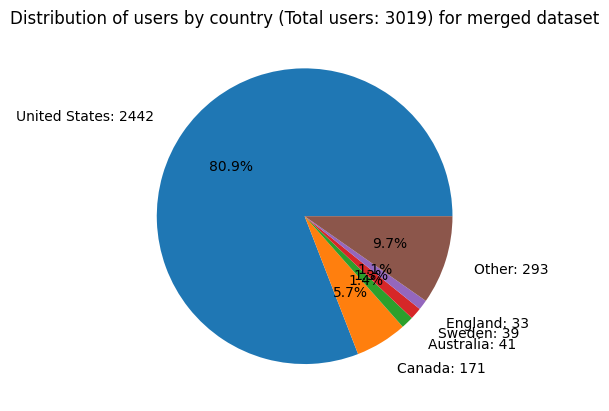

In [78]:
# Remove the states to only have the countries
users_merged['country'] = users_merged['location.0'].str.split(',').str[0]

# Compute the number of users in the top 5 countries
top5_countries = users_merged['country'].value_counts().nlargest(5)

# Compute the sum of the remaining countries
other_countries_count = users_merged['country'].value_counts().sum() - top5_countries.sum()

# Add the other countries count
top_countries = pd.concat([top5_countries, pd.Series({'Other': other_countries_count})])

# Calculate percentages for each country in top_countries
total_users = users_merged['country'].value_counts().sum()
top_countries_percent = (top_countries / total_users * 100).round(1)

# Create labels with country name, count, and percentage
top_countries_labels = [f"{country}: {count} " for country, count in zip(top_countries.index, top_countries)]

top_countries.plot(
    kind='pie',
    autopct='%1.1f%%',
    labels=top_countries_labels,
    labeldistance=1.2,       # Controls the position of the label
)
plt.title(f'Distribution of users by country (Total users: {total_users}) for merged dataset')
plt.ylabel('') 
plt.show()

In [10]:
top10_countries

country
United States    2442
Canada            171
Australia          41
Sweden             39
England            33
Name: count, dtype: int64

For the merged dataset : 80.8% of the users originate from the United States, in particularly there are 2442 users from this country.


#### Number of ratings per country


In [44]:
# Convert number of ratings values in numeric
users_merged['nbr_ratings.1'] = pd.to_numeric(users_merged['nbr_ratings.1'], errors='coerce')
users_merged['nbr_ratings.0'] = pd.to_numeric(users_merged['nbr_ratings.0'], errors='coerce')

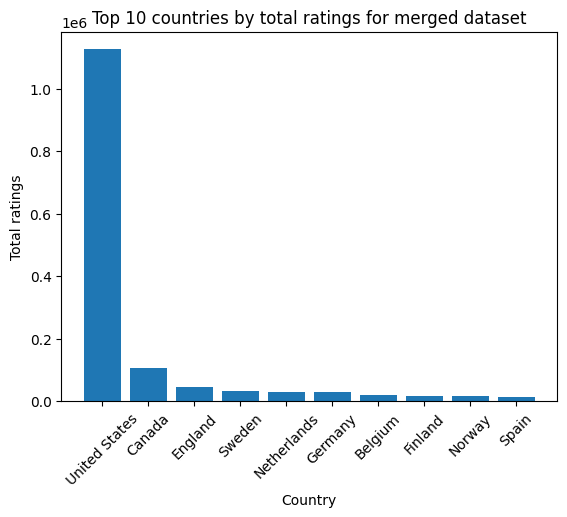

In [45]:
# Compute the sum of the number of ratings from the two website
users_merged['total_ratings'] = users_merged['nbr_ratings.0'] + users_merged['nbr_ratings.1']

# Regroup the number of ratings by countries
country_ratings = users_merged.groupby('country')['total_ratings'].sum().reset_index()

# Get the top 10 countries
top_countries = country_ratings.nlargest(10, 'total_ratings')

# Bar plot
plt.bar(top_countries['country'], top_countries['total_ratings'])
plt.xlabel('Country')
plt.ylabel('Total ratings')
plt.title('Top 10 countries by total ratings for merged dataset')
plt.xticks(rotation=45)
plt.show()

# Beer Advocate

### Loading

In [46]:
file_path = 'data/BeerAdvocate.tar.gz'
with tarfile.open(file_path, 'r:gz') as tar:
    tar.extractall(path='../data')  
    tar.list()

?rwxrwxrwx gayouf/gayouf   29617210 2017-10-27 18:01:43 beers.csv 
?rwxrwxrwx gayouf/gayouf  729167813 2017-08-03 14:28:54 reviews.txt.gz 
?rwxrwxrwx gayouf/gayouf    9751813 2017-08-07 13:23:35 users.csv 
?rwxrwxrwx gayouf/gayouf     808192 2017-08-04 18:22:30 breweries.csv 
?rwxrwxr-x gayouf/gayouf  926302646 2017-08-03 14:29:24 ratings.txt.gz 


In [47]:
beers_ba = pd.read_csv('../data/beers.csv')
reviews_ba = pd.read_csv('../data/reviews.txt.gz', delimiter='\t', on_bad_lines='skip')
users_ba = pd.read_csv('../data/users.csv')
breweries_ba = pd.read_csv('../data/breweries.csv')
ratings_ba = pd.read_csv('../data/ratings.txt.gz', delimiter='\t', on_bad_lines='skip')

In [24]:
users_ba

,nbr_ratings,nbr_reviews,user_id,user_name,joined,location
0,7820,465,nmann08.184925,nmann08,1.199704e+09,"United States, Washington"
1,2521,2504,stjamesgate.163714,StJamesGate,1.191838e+09,"United States, New York"
2,1797,1143,mdagnew.19527,mdagnew,1.116410e+09,Northern Ireland
3,31,31,helloloser12345.10867,helloloser12345,1.101380e+09,Northern Ireland
4,604,604,cypressbob.3708,cypressbob,1.069326e+09,Northern Ireland
...,...,...,...,...,...,...
153699,1,1,everman.532342,Everman,1.291115e+09,"United States, California"
153700,1,1,justin0001.352175,Justin0001,1.248343e+09,"United States, California"
153701,1,0,kyungsup.982216,Kyungsup,1.430561e+09,NaN
153702,1,1,joetex.800347,JoeTex,1.400234e+09,"United States, California"


In [26]:
users_ba = users_ba.drop_duplicates(subset=['user_name']) # make sure there are no duplicates in user names
users_ba

,nbr_ratings,nbr_reviews,user_id,user_name,joined,location
0,7820,465,nmann08.184925,nmann08,1.199704e+09,"United States, Washington"
1,2521,2504,stjamesgate.163714,StJamesGate,1.191838e+09,"United States, New York"
2,1797,1143,mdagnew.19527,mdagnew,1.116410e+09,Northern Ireland
3,31,31,helloloser12345.10867,helloloser12345,1.101380e+09,Northern Ireland
4,604,604,cypressbob.3708,cypressbob,1.069326e+09,Northern Ireland
...,...,...,...,...,...,...
153699,1,1,everman.532342,Everman,1.291115e+09,"United States, California"
153700,1,1,justin0001.352175,Justin0001,1.248343e+09,"United States, California"
153701,1,0,kyungsup.982216,Kyungsup,1.430561e+09,NaN
153702,1,1,joetex.800347,JoeTex,1.400234e+09,"United States, California"


## Country analysis


#### For users

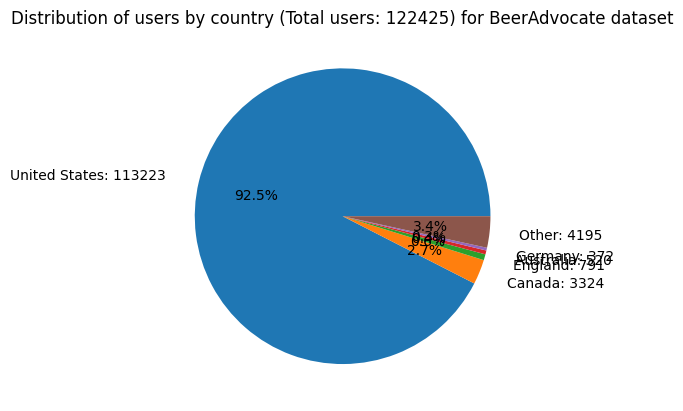

In [85]:
# Remove the states to only have the countries
users_ba['country'] = users_ba['location'].str.split(',').str[0]

# Compute the number of users in the top 5 countries
top5_countries = users_ba['country'].value_counts().nlargest(5)

# Compute the sum of the remaining countries
other_countries_count = users_ba['country'].value_counts().sum() - top5_countries.sum()

# Add the other countries count
top_countries = pd.concat([top5_countries, pd.Series({'Other': other_countries_count})])

# Calculate percentages for each country in top_countries
total_users = users_ba['country'].value_counts().sum()
top_countries_percent_ba = (top_countries / total_users * 100).round(1)

# Create labels with country name, count, and percentage
top_countries_labels = [f"{country}: {count} " for country, count in zip(top_countries.index, top_countries)]

top_countries.plot(
    kind='pie',
    labels=top_countries_labels,
    autopct='%1.1f%%',
    labeldistance=1.2,       # Controls the position of the label
)
plt.title(f'Distribution of users by country (Total users: {total_users}) for BeerAdvocate dataset')
plt.ylabel('') 
plt.show()

In [30]:
top10_countries

country
United States    113223
Canada             3324
England             791
Australia           520
Germany             372
Name: count, dtype: int64

For BeerAdvocates: 92.5% of users originate from United States, precisely 113'223 users. 

#### Number of ratings per country

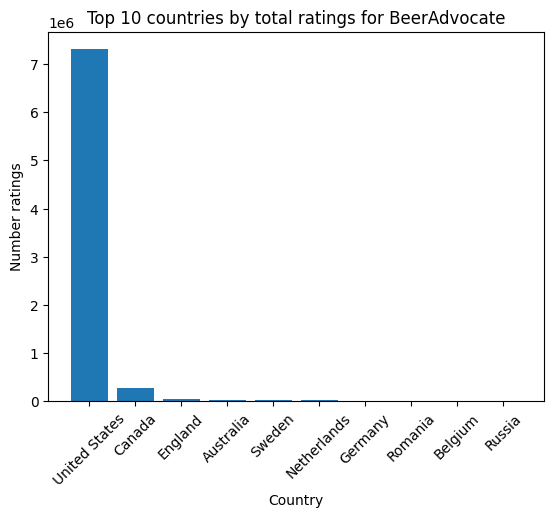

In [54]:
# Convert number of ratings values in numeric
users_ba['nbr_ratings'] = pd.to_numeric(users_ba['nbr_ratings'], errors='coerce')

# Regroup the number of ratings by countries
country_ratings = users_ba.groupby('country')['nbr_ratings'].sum().reset_index()

# Get the top 10 countries
top_countries = country_ratings.nlargest(10, 'nbr_ratings')

# Bar plot
plt.bar(top_countries['country'], top_countries['nbr_ratings'])
plt.xlabel('Country')
plt.ylabel('Number ratings')
plt.title('Top 10 countries by total ratings for BeerAdvocate')
plt.xticks(rotation=45)
plt.show()

# RateBeer


### Loading

In [55]:
file_path = 'data/RateBeer.tar.gz'
with tarfile.open(file_path, 'r:gz') as tar:
    tar.extractall(path='../data')
    tar.list()

?rwxrwxrwx gayouf/gayouf   47204946 2017-10-27 18:02:52 beers.csv 
?rwxrwxr-x gayouf/gayouf  926392900 2017-08-03 19:55:50 reviews.txt.gz 
?rwxrwxrwx gayouf/gayouf    3202831 2017-08-07 13:16:07 users.csv 
?rwxrwxrwx gayouf/gayouf    1038205 2017-08-03 19:54:31 breweries.csv 
?rwxrwxr-x gayouf/gayouf  926392900 2017-08-03 19:55:50 ratings.txt.gz 


In [56]:
beers_rb = pd.read_csv('../data/beers.csv')
reviews_rb = pd.read_csv('../data/reviews.txt.gz', delimiter='\t', on_bad_lines='skip')
users_rb = pd.read_csv('../data/users.csv')
breweries_rb = pd.read_csv('../data/breweries.csv')
ratings_rb = pd.read_csv('../data/ratings.txt.gz', delimiter='\t', on_bad_lines='skip')

In [58]:
users_rb

,nbr_ratings,user_id,user_name,joined,location
0,1890,175852,Manslow,1.337508e+09,Poland
1,89,442761,MAGICuenca91,1.484046e+09,Spain
2,169,288889,Sibarh,1.384600e+09,Poland
3,3371,250510,fombe89,1.363950e+09,Spain
4,13043,122778,kevnic2008,1.296644e+09,Germany
...,...,...,...,...,...
70169,1,134893,stamfordbus,1.315217e+09,England
70170,1,327816,fobia405,1.406282e+09,Belgium
70171,1,183139,junkin,1.339841e+09,NaN
70172,3,82020,klesidra,1.222250e+09,Slovenia


In [61]:
users_rb = users_rb.drop_duplicates(subset=['user_name']) # make sure there are no duplicates in user names
users_rb

,nbr_ratings,user_id,user_name,joined,location
0,1890,175852,Manslow,1.337508e+09,Poland
1,89,442761,MAGICuenca91,1.484046e+09,Spain
2,169,288889,Sibarh,1.384600e+09,Poland
3,3371,250510,fombe89,1.363950e+09,Spain
4,13043,122778,kevnic2008,1.296644e+09,Germany
...,...,...,...,...,...
70169,1,134893,stamfordbus,1.315217e+09,England
70170,1,327816,fobia405,1.406282e+09,Belgium
70171,1,183139,junkin,1.339841e+09,NaN
70172,3,82020,klesidra,1.222250e+09,Slovenia


## Country analysis

#### For users

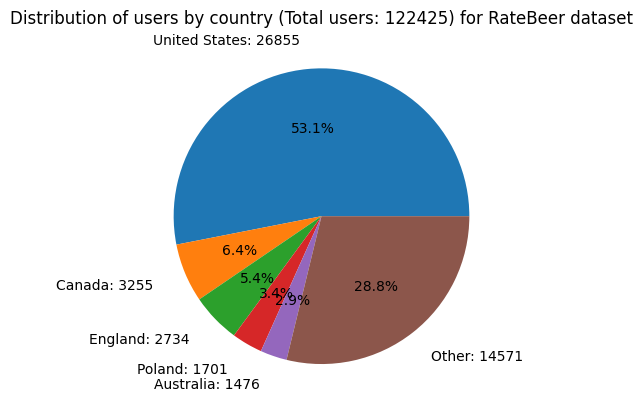

In [86]:
# Remove the states to only have the countries
users_rb['country'] = users_rb['location'].str.split(',').str[0]

# Compute the number of users in the top 5 countries
top5_countries = users_rb['country'].value_counts().nlargest(5)

# Compute the sum of the remaining countries
other_countries_count = users_rb['country'].value_counts().sum() - top5_countries.sum()

# Add the other countries count
top_countries = pd.concat([top5_countries, pd.Series({'Other': other_countries_count})])

# Calculate percentages for each country in top_countries
total_users = users_ba['country'].value_counts().sum()
top_countries_percent_rb = (top_countries / total_users * 100).round(1)

# Create labels with country name, count, and percentage
top_countries_labels = [f"{country}: {count} " for country, count in zip(top_countries.index, top_countries)]

top_countries.plot(
    kind='pie',
    labels=top_countries_labels,
    autopct='%1.1f%%',
    labeldistance=1.2,       # Controls the position of the label
)
plt.title(f'Distribution of users by country (Total users: {total_users}) for RateBeer dataset')
plt.ylabel('') 
plt.show()

In [63]:
top10_countries

country
United States    26855
Canada            3255
England           2734
Poland            1701
Australia         1476
Name: count, dtype: int64

#### Number of ratings per country

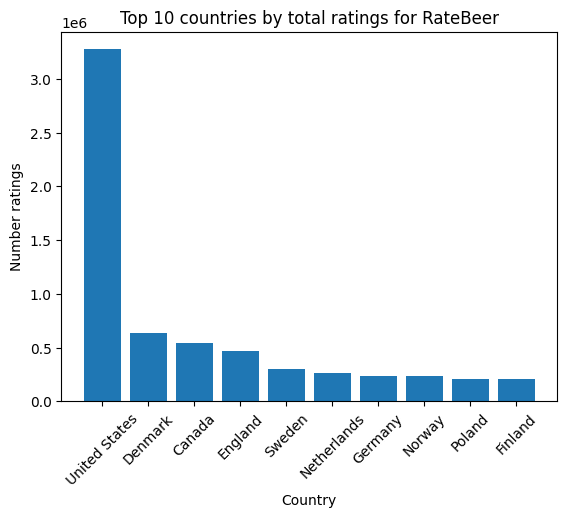

In [64]:
# Convert number of ratings values in numeric
users_rb['nbr_ratings'] = pd.to_numeric(users_rb['nbr_ratings'], errors='coerce')

# Regroup the number of ratings by countries
country_ratings = users_rb.groupby('country')['nbr_ratings'].sum().reset_index()

# Get the top 10 countries
top_countries = country_ratings.nlargest(10, 'nbr_ratings')

# Bar plot
plt.bar(top_countries['country'], top_countries['nbr_ratings'])
plt.xlabel('Country')
plt.ylabel('Number ratings')
plt.title('Top 10 countries by total ratings for RateBeer')
plt.xticks(rotation=45)
plt.show()